In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import free_throw_streaks

import scipy.stats

# Are free throws streaky?
## The Lukewarm Hand, part 3
### by Casey Durfee <csdurfee@gmail.com>


Free throws are much more consistent than field goals. Every free throw should have the same degree of difficulty, thus, assuming all shots have the same likelihood of going in is much more solid than in looking at field goals. Additionally free throw percentage is going to have lower variance than field goal percentage because it is higher (further away from 50%, where variance is maximum for the number of exepected streaks.)


I collected free throw data from the NBA for the last 4 seasons.

In [3]:
fts = free_throw_streaks.FreeThrowStreaks()

In [4]:
base_freethrows = fts.get_data()


In [5]:
base_freethrows

,game_id,time,player_id,result
0,0022100001,2021-10-19T23:38:21.1Z,1629651,Missed
1,0022100001,2021-10-19T23:38:21.1Z,1629651,Missed
2,0022100001,2021-10-19T23:42:24.5Z,201933,Made
3,0022100001,2021-10-19T23:42:40.1Z,201933,Made
4,0022100001,2021-10-19T23:48:24.5Z,203507,Missed
...,...,...,...,...
218399,0022401230,2024-12-15T04:05:55.4Z,1630578,Missed
218400,0022401230,2024-12-15T04:09:34.5Z,1628415,Missed
218401,0022401230,2024-12-15T04:13:54.0Z,1630224,Made
218402,0022401230,2024-12-15T04:14:49.2Z,1628983,Made


This covers over 200,000 free throw attempts from 855 different players.

In [6]:
base_freethrows.player_id.nunique()

855

When calculating the stats, we lose a fair number of players, because the Wald-Wolfowitz test needs there to be at least 3 *expected* streaks for the variance calculation to work.

In [7]:
ft_stats = fts.get_data_with_stats()

In [8]:
ft_stats[ft_stats.z_score.isna()].expected_streaks.value_counts()

expected_streaks
1.0    59
2.0    14
Name: count, dtype: int64

In [9]:
ft_stats = ft_stats[ft_stats.variance > 0].copy()

I didn't fetch the player names yet, because I might not need them.

In [10]:
ft_stats

,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score
player_id,,,,,,,,,
2544,FIXME,1067,331,501,LWLWLWWWWWLWWWWWWWWLWWWLWWWWLWWWWWWLWWWWLWLWWL...,506.260372,182.378513,13.504759,-0.389520
2546,FIXME,132,27,43,WLWWWWWWWWLLWWWWWWWWWWLLWWWLWLWWWWWWWWLWWWWWWW...,45.830189,12.436175,3.526496,-0.802550
2617,FIXME,7,1,3,WWWWLWWW,2.750000,0.187500,0.433013,0.577350
2730,FIXME,96,50,65,WWLWLWWWWWWWWLWWWLLWLWLLLWWWLLWLLLWWWLWWWLWLLW...,66.753425,29.363858,5.418843,-0.323579
2738,FIXME,17,6,10,WWLLWWWWWWWLWWWWLWLWWWL,9.869565,3.172710,1.781210,0.073228
...,...,...,...,...,...,...,...,...,...
1642419,FIXME,16,2,3,WWLLWWWWWWWWWWWWWW,4.555556,0.534495,0.731092,-2.127716
1642422,FIXME,2,5,5,LLWLLWL,3.857143,0.884354,0.940401,1.215287
1642449,FIXME,2,1,2,WWL,2.333333,0.222222,0.471405,-0.707107


In [11]:
ft_stats.z_score.describe()

count    782.000000
mean      -0.095598
std        0.996716
min       -2.718493
25%       -0.810517
50%       -0.089189
75%        0.680620
max        2.646512
Name: z_score, dtype: float64

The distribution isn't very normal. There's a bunch of density missing right in the center.  What does that mean? I don't know!

In [12]:
scipy.stats.shapiro(ft_stats.z_score).pvalue

np.float64(5.180935389248189e-05)

Text(0.5, 1.0, 'free throws, z-score, 4 year')

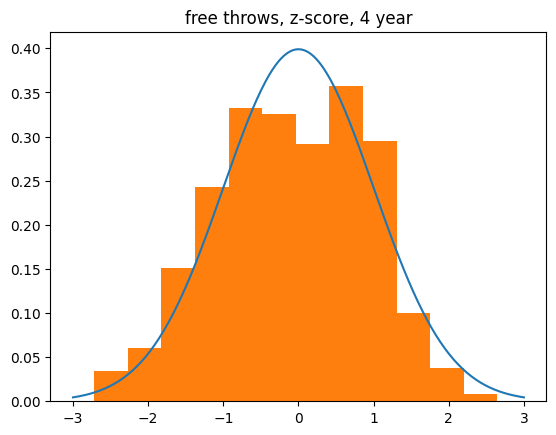

In [13]:
x = np.linspace(-3,3,200)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 1))
out = plt.hist(ft_stats.z_score, bins=12, density=True)
plt.title("free throws, z-score, 4 year")

### Heavy Shooters Only

What about players with a large number of makes? That eliminates most players.

[1.0000e+00 2.1740e+02 4.3380e+02 6.5020e+02 8.6660e+02 1.0830e+03
 1.2994e+03 1.5158e+03 1.7322e+03 1.9486e+03 2.1650e+03]


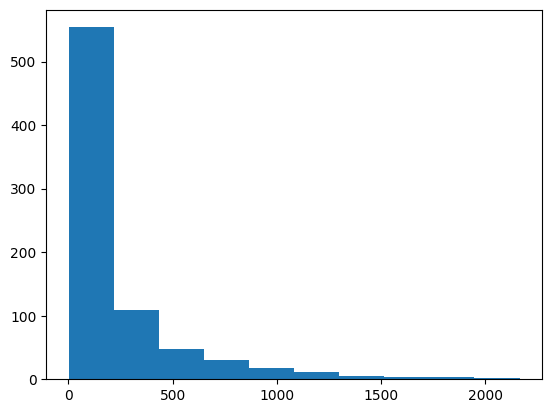

In [48]:
out = plt.hist(ft_stats.makes)
print(out[1])

In [15]:
df_minus_outliers = ft_stats[ft_stats.makes > 200].copy()

In [50]:
len(df_minus_outliers)

240

Here is the distribution of the 240 players with over 200 free throw attempts. The tail on the right (the lukewarm hand) is kind of missing. The max positive z-score is 1.8 while the max negative z score is -2.7.

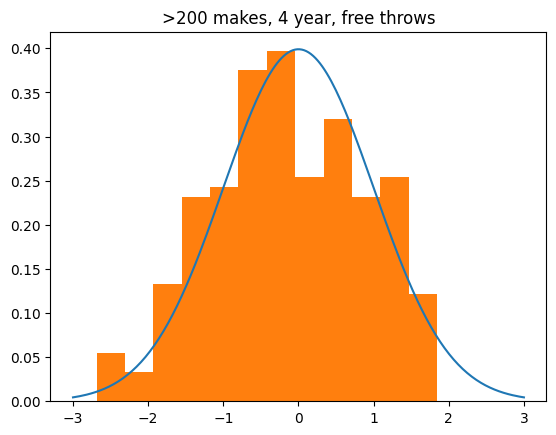

In [16]:
x = np.linspace(-3,3,200)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 1))
plt.title(">200 makes, 4 year, free throws")

out = plt.hist(df_minus_outliers.z_score, bins=12, density=True)

This data is a little abnormal, but it's a fairly small sample size so I'm not reading too much into it.

In [15]:
scipy.stats.shapiro(df_minus_outliers.z_score).pvalue

np.float64(0.01126035804081986)

In [16]:
df_minus_outliers.z_score.describe()

count    240.000000
mean      -0.144277
std        1.021330
min       -2.686543
25%       -0.854723
50%       -0.174146
75%        0.660302
max        1.845302
Name: z_score, dtype: float64

testing whether mean=0 is plausible:

In [17]:
descr = df_minus_outliers.z_score.describe()

z_score_zero_mean = descr['mean'] / np.sqrt(1/len(df_minus_outliers)) 

print(z_score_zero_mean)

-2.2351248381390554


In [18]:
p_value_zero_mean = scipy.stats.norm.cdf(z_score_zero_mean)

p_value_zero_mean

np.float64(0.012704577075413745)

So there may be a slight tendency for free throw shooters to be streakier than flipping a coin.

### Who are the streaky ones?
s

In [19]:
streaky_ones = df_minus_outliers[df_minus_outliers.z_score <= -2].copy()

Hopefully, I can get the names from the field goal data.

In [20]:
import streaky_players

In [52]:
ps =  streaky_players.PlayerStreaks()
fg_data = ps.get_data()

names = fg_data[["player_name"]]

In [22]:
names

,player_name
player_id,
1630173,Precious Achiuwa
203500,Steven Adams
1628389,Bam Adebayo
1630534,Ochai Agbaji
1630583,Santi Aldama
...,...
1629027,Trae Young
1627826,Ivica Zubac
1641783,Tristan da Silva


In [23]:
streaky_with_name = streaky_ones.drop("player_name", axis=1).join(names, on='player_id',lsuffix="_l")

In [38]:
streaky_with_name[['player_name', 'z_score']]

,player_name,z_score
player_id,,
1626157,Karl-Anthony Towns,-2.099252
1626174,NaN,-2.282157
1628370,Malik Monk,-2.397378
1628984,NaN,-2.674341
1629675,Naz Reid,-2.634281
1630173,Precious Achiuwa,-2.686543
1630703,Scoot Henderson,-2.524082


In [25]:
base_freethrows.time.min()


'2021-10-19T23:38:21.1Z'

In [26]:
base_freethrows.time.max()

'2025-04-13T22:25:20.2Z'